In [1]:
import warnings
warnings.filterwarnings('ignore')
from numpy import set_printoptions
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
pd.options.display.max_columns=None
import seaborn as sns 
import io
import base64
import json
from openpyxl import Workbook
from openpyxl.drawing.image import Image as XLImage

from urllib.error import HTTPError

import os
import os.path
import io

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer


In [2]:
SCOPES = ['https://www.googleapis.com/auth/drive.readonly']

creds = None
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file('C:/Users/Intevo/Desktop/UNIVERSIDAD DISTRITAL PROYECTO FOLDER/credentials.json', SCOPES) # Reemplazar con la ruta correcta
        creds = flow.run_local_server(port=0)
    with open('C:/Users/Intevo/Desktop/UNIVERSIDAD DISTRITAL PROYECTO FOLDER/token.json', 'w') as token:
        token.write(creds.to_json())
        
# Crear una instancia de la API de Drive
drive_service = build('drive', 'v3', credentials=creds)

# ID de la carpeta de Google Drive
folder_id = '1hQeetmO4XIObUefS_nzePqKqq3VksUEC'

# Ruta de destino para guardar los archivos descargados
save_path = 'C:/Users/Intevo/Desktop/UNIVERSIDAD DISTRITAL PROYECTO FOLDER/UNIVERSIDAD-DISTRITAL-PROYECTO/MODULO_ANALITICA_DIAGNOSTICA/DATOS'  # Reemplazar con la ruta deseada

# Función para descargar archivos de la carpeta de Drive
def download_folder(folder_id, save_path):
    results = drive_service.files().list(
        q=f"'{folder_id}' in parents and trashed=false",
        fields='files(id, name)').execute()
    items = results.get('files', [])
    for item in items:
        file_id = item['id']
        file_name = item['name']
        request = drive_service.files().get_media(fileId=file_id)
        fh = io.FileIO(os.path.join(save_path, file_name), 'wb')
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()
            print(f"Descargando {file_name}: {int(status.progress() * 100)}%")
    print("Descarga completa")

# Descargar archivos de la carpeta
download_folder(folder_id, save_path)

# Listar archivos descargados
files = os.listdir(save_path)
print("Archivos descargados:")
for file in files:
    print(file)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=899973764197-biu188dkvsgi2al0fh29udm7keak0lh0.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A54378%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&state=HC4PSqU5YRZzxEWlIjzYWt9eGuDH1p&access_type=offline
Descargando catastral.csv: 100%
Descargando electrica.csv: 100%
Descargando sistemas.csv: 100%
Descargando electronica1.csv: 100%
Descargando Limpieza de datos 1 UD.ipynb: 100%
Descargando industrial10.csv: 100%
Descargando industrial9.csv: 100%
Descargando industrial8.csv: 100%
Descargando industrial7.csv: 100%
Descargando industrial6.csv: 100%
Descargando industrial5.csv: 100%
Descargando industrial3.csv: 100%
Descargando industrial4.csv: 100%
Descargando industrial2.csv: 100%
Descargando industrial1.csv: 100%
Descarga completa
Archivos descargados:
catastral.csv
electrica.csv
electronica1.csv
industrial1.csv
industrial10.csv


In [3]:
diccionario_seleccion = {
    "columnas": ['LOCALIDAD_COLEGIO', 'ESTRATO', 'PG_ICFES', 'DISTANCIA'] 
}

In [4]:
def cargar_datos(carrera, semestre):
    
    ruta_archivo = f'C:/Users/Intevo/Desktop/UNIVERSIDAD DISTRITAL PROYECTO FOLDER/UNIVERSIDAD-DISTRITAL-PROYECTO/MODULO_ANALITICA_DIAGNOSTICA/DATOS/{carrera}{semestre}.csv'
    datos = pd.read_csv(ruta_archivo,sep=";")
    
    return datos
carrera="industrial"
semestre="1"

In [5]:
df = cargar_datos(carrera, semestre)
X=df             
print(X.shape)

(2008, 24)


In [6]:
X1=X.copy(deep=True)
X_R1 = X.copy(deep=True)  
X_E1 = X.copy(deep=True)  
X_N1 = X.copy(deep=True)   
X_ROB1 = X.copy(deep=True)   
X_T_BOX1 = X.copy(deep=True)  
X_T_JOHNSON1 = X.copy(deep=True) 


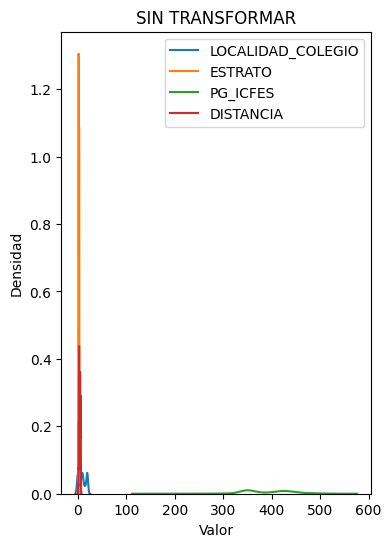

In [8]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

if columnas_seleccionadas:
    X = X1[columnas_seleccionadas]
else:
    X = X1 

fig1, ax = plt.subplots(figsize=(4, 6))
for columna in X.columns:
    sns.kdeplot(X[columna], ax=ax, label=columna)
ax.set_title('SIN TRANSFORMAR')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [47]:
def reescalar_datos(X):
    transformador = MinMaxScaler(feature_range=(0, 1)).fit(X)
    datos_reescalados = transformador.transform(X)
    set_printoptions(precision=3)
    print(datos_reescalados[:5, :])
    datos_reescalados_df = pd.DataFrame(data=datos_reescalados, columns=X.columns)
    return datos_reescalados_df
Xpandas_R1 = reescalar_datos(X_R1)
Xpandas_R1.head(2)

[[1.    0.    0.952 0.    0.    0.    0.825 0.337 0.566 0.738 0.728 0.667
  0.436 0.394 0.    0.777 0.794 0.95  0.833 0.778 0.6   0.    0.333 0.77 ]
 [1.    1.    0.095 0.333 0.084 0.161 0.947 0.783 0.858 0.704 0.765 0.795
  0.653 0.449 0.    0.758 0.604 0.    0.667 0.778 0.6   0.    0.333 0.81 ]
 [0.    1.    0.952 0.333 0.535 0.581 0.847 0.309 0.547 0.77  0.798 0.639
  0.389 0.479 0.    0.758 0.771 0.95  0.833 0.778 0.6   0.    0.    0.623]
 [0.    0.5   0.905 0.333 0.084 0.161 0.96  0.642 0.765 0.707 0.761 0.726
  0.536 0.792 0.    0.744 0.751 0.9   0.667 0.778 0.4   0.    0.    0.53 ]
 [0.    1.    0.381 0.333 0.084 0.161 0.835 0.505 0.676 0.707 0.645 0.696
  0.485 0.523 0.    0.71  0.699 0.35  0.333 0.778 0.6   0.    0.333 0.795]]


,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO
0,1.0,0.0,0.952381,0.000000,0.000000,0.00000,0.824597,0.337237,0.565776,0.738283,0.728067,0.666601,0.435586,0.393651,0.0,0.776667,0.7940,0.95,0.833333,0.777778,0.6,0.0,0.333333,0.770289
1,1.0,1.0,0.095238,0.333333,0.084071,0.16129,0.946910,0.782632,0.857586,0.704242,0.765043,0.795005,0.652963,0.448889,0.0,0.758095,0.6044,0.00,0.666667,0.777778,0.6,0.0,0.333333,0.809716


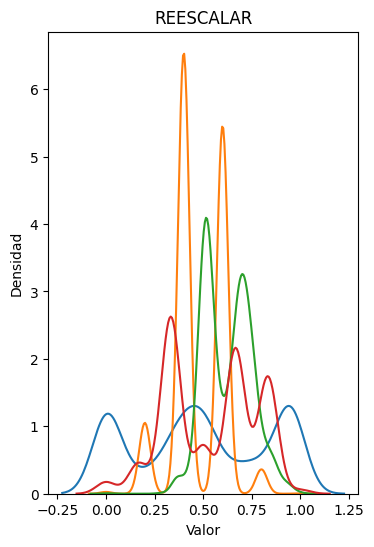

In [48]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

if columnas_seleccionadas:
    Xpandas_R = Xpandas_R1[columnas_seleccionadas]
else:
    Xpandas_R = Xpandas_R1

fig2, ax = plt.subplots(figsize=(4, 6))
for columna in Xpandas_R.columns:
    sns.kdeplot(Xpandas_R[columna], ax=ax, label=columna)
ax.set_title('REESCALAR')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [49]:
def estandarizar_datos(X):
    transformador = StandardScaler().fit(X)
    datos_estandarizados = transformador.transform(X)
    set_printoptions(precision=3)
    print(datos_estandarizados[:5, :])
    datos_estandarizados_df = pd.DataFrame(data=datos_estandarizados, columns=X.columns)
    return datos_estandarizados_df
Xpandas_E1 = estandarizar_datos(X_E1)
Xpandas_E1.head(2)


[[ 1.426 -0.867  1.352 -0.915 -0.487 -0.677  1.64  -0.833  0.55   1.209
   1.35   1.105  0.51  -0.787 -0.777  1.273  1.281  1.42   1.281  0.277
   0.915 -1.567  0.543  0.626]
 [ 1.426  1.537 -1.142  0.956 -0.085  0.245  2.643  3.11   1.512  1.103
   1.474  1.527  2.292 -0.372 -0.777  1.217 -0.257 -1.983  0.56   0.277
   0.915 -1.567  0.543  0.835]
 [-0.701  1.537  1.352  0.956  2.072  2.643  1.826 -1.082  0.489  1.308
   1.584  1.015  0.132 -0.143 -0.777  1.217  1.097  1.42   1.281  0.277
   0.915 -1.567 -1.304 -0.159]
 [-0.701  0.335  1.214  0.956 -0.085  0.245  2.752  1.865  1.208  1.111
   1.459  1.3    1.333  2.206 -0.777  1.173  0.932  1.241  0.56   0.277
  -0.559 -1.567 -1.304 -0.649]
 [-0.701  1.537 -0.31   0.956 -0.085  0.245  1.726  0.65   0.912  1.111
   1.074  1.2    0.911  0.189 -0.777  1.072  0.513 -0.729 -0.881  0.277
   0.915 -1.567  0.543  0.758]]


,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO
0,1.425915,-0.866776,1.352224,-0.914882,-0.486918,-0.677315,1.640362,-0.833479,0.549845,1.208546,1.350470,1.104753,0.510276,-0.786710,-0.776993,1.272874,1.281069,1.420176,1.280588,0.27692,0.915186,-1.566592,0.54268,0.625628
1,1.425915,1.537210,-1.141769,0.955874,-0.085030,0.244877,2.643092,3.110076,1.511683,1.103045,1.473698,1.526924,2.291837,-0.371764,-0.776993,1.216846,-0.257296,-1.983464,0.559898,0.27692,0.915186,-1.566592,0.54268,0.835168


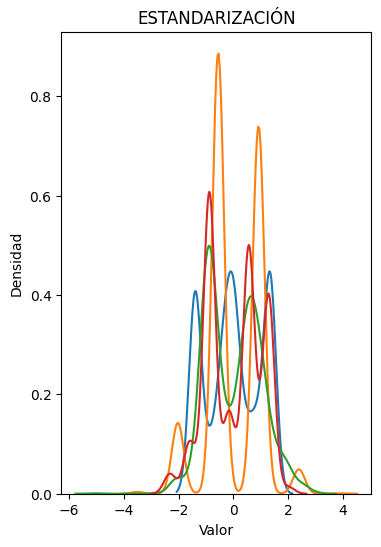

In [50]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

if columnas_seleccionadas:
    Xpandas_E = Xpandas_E1[columnas_seleccionadas]
else:
    Xpandas_E = Xpandas_E1 

fig3, ax = plt.subplots(figsize=(4, 6))

for columna in Xpandas_E.columns:
    sns.kdeplot(Xpandas_E[columna], ax=ax, label=columna)
ax.set_title('ESTANDARIZACIÓN')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [51]:
def normalizar_datos(X):
    transformador = Normalizer().fit(X)
    datos_normalizados = transformador.transform(X)
    set_printoptions(precision=3)
    print(datos_normalizados[:5, :])
    datos_normalizados_df = pd.DataFrame(data=datos_normalizados, columns=X.columns)
    return datos_normalizados_df
Xpandas_N1 = normalizar_datos(X_N1)
Xpandas_N1.head(2)


[[4.815e-04 0.000e+00 9.629e-03 0.000e+00 0.000e+00 0.000e+00 2.283e-01
  3.160e-02 3.160e-02 3.519e-02 3.612e-02 3.264e-02 3.264e-02 2.783e-02
  0.000e+00 3.141e-02 3.823e-02 9.629e-03 2.889e-03 4.333e-03 1.444e-03
  9.682e-01 9.629e-04 1.717e-02]
 [4.781e-04 9.562e-04 9.562e-04 4.781e-04 9.084e-03 2.390e-03 2.501e-01
  4.756e-02 4.756e-02 3.333e-02 3.769e-02 3.866e-02 3.866e-02 2.930e-02
  0.000e+00 3.044e-02 2.890e-02 4.781e-04 2.390e-03 4.303e-03 1.434e-03
  9.614e-01 9.562e-04 1.791e-02]
 [0.000e+00 9.603e-04 9.603e-03 4.802e-04 5.810e-02 8.643e-03 2.320e-01
  3.049e-02 3.049e-02 3.662e-02 3.949e-02 3.122e-02 3.122e-02 3.035e-02
  0.000e+00 3.058e-02 3.703e-02 9.603e-03 2.881e-03 4.321e-03 1.440e-03
  9.656e-01 4.802e-04 1.389e-02]
 [0.000e+00 4.779e-04 9.079e-03 4.779e-04 9.079e-03 2.389e-03 2.526e-01
  4.243e-02 4.243e-02 3.344e-02 3.746e-02 3.528e-02 3.528e-02 3.961e-02
  0.000e+00 2.985e-02 3.589e-02 9.079e-03 2.389e-03 4.301e-03 9.557e-04
  9.610e-01 4.779e-04 1.181e-02]
 [0.

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO
0,0.000481,0.000000,0.009629,0.000000,0.000000,0.00000,0.228316,0.031599,0.031599,0.035190,0.036120,0.032643,0.032643,0.027829,0.0,0.031411,0.038228,0.009629,0.002889,0.004333,0.001444,0.968229,0.000963,0.017172
1,0.000478,0.000956,0.000956,0.000478,0.009084,0.00239,0.250128,0.047560,0.047560,0.033332,0.037687,0.038658,0.038658,0.029297,0.0,0.030444,0.028895,0.000478,0.002390,0.004303,0.001434,0.961423,0.000956,0.017912


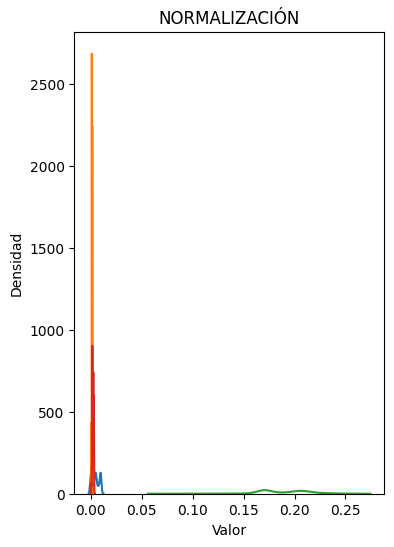

In [52]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

if columnas_seleccionadas:
    Xpandas_N = Xpandas_N1[columnas_seleccionadas]
else:
    Xpandas_N = Xpandas_N1 

fig4, ax = plt.subplots(figsize=(4, 6))
for columna in Xpandas_N.columns:
    sns.kdeplot(Xpandas_N[columna], ax=ax, label=columna)
ax.set_title('NORMALIZACIÓN')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [53]:
def estandarizacion_robusta(X):
    transformador = RobustScaler(quantile_range=(25, 75)).fit(X)
    datos_estandarizados = transformador.transform(X)
    set_printoptions(precision=3)
    print(datos_estandarizados[:5, :])
    datos_estandarizados_df = pd.DataFrame(data=datos_estandarizados, columns=X.columns)
    return datos_estandarizados_df
Xpandas_ROB1 = estandarizacion_robusta(X_ROB1)
Xpandas_ROB1.head(2)


[[ 1.     0.     0.714  0.     0.     0.     0.991 -0.737  0.008  0.319
   0.397  0.239  0.384 -0.554  0.     0.386  0.911  0.864  0.75   0.
   1.    -1.     0.     0.349]
 [ 1.     2.    -0.571  1.     1.     1.     1.611  2.648  0.462  0.265
   0.461  0.449  1.691 -0.286  0.     0.358 -0.142 -0.864  0.25   0.
   1.    -1.     0.     0.568]
 [ 0.     2.     0.714  1.     6.368  3.6    1.105 -0.95  -0.02   0.369
   0.518  0.194  0.108 -0.138  0.     0.358  0.785  0.864  0.75   0.
   1.    -1.    -1.    -0.473]
 [ 0.     1.     0.643  1.     1.     1.     1.678  1.579  0.319  0.27
   0.454  0.336  0.988  1.377  0.     0.336  0.672  0.773  0.25   0.
   0.    -1.    -1.    -0.985]
 [ 0.     2.    -0.143  1.     1.     1.     1.044  0.536  0.179  0.27
   0.255  0.286  0.678  0.075  0.     0.285  0.385 -0.227 -0.75   0.
   1.    -1.     0.     0.487]]


,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO
0,1.0,0.0,0.714286,0.0,0.0,0.0,0.990823,-0.737,0.008443,0.318889,0.397333,0.238710,0.3845,-0.553846,0.0,0.386182,0.911111,0.863636,0.75,0.0,1.0,-1.0,0.0,0.348631
1,1.0,2.0,-0.571429,1.0,1.0,1.0,1.610823,2.648,0.462075,0.265397,0.460833,0.449355,1.6905,-0.286154,0.0,0.357818,-0.142222,-0.863636,0.25,0.0,1.0,-1.0,0.0,0.567834


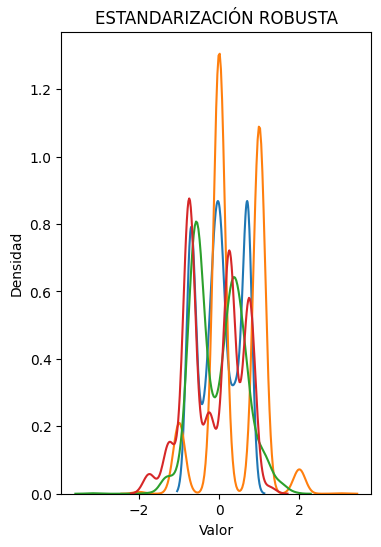

In [54]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])
if columnas_seleccionadas:
    Xpandas_ROB = Xpandas_ROB1[columnas_seleccionadas]
else:
    Xpandas_ROB = Xpandas_ROB1 

fig5, ax = plt.subplots(figsize=(4, 6))
for columna in Xpandas_ROB.columns:
    sns.kdeplot(Xpandas_ROB[columna], ax=ax, label=columna)
ax.set_title('ESTANDARIZACIÓN ROBUSTA')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [55]:
def transformacion_johnson(X):
    transformador_johnson = PowerTransformer(method='yeo-johnson', standardize=True).fit(X)
    datos_transformados = transformador_johnson.transform(X)
    set_printoptions(precision=3)
    print(datos_transformados[:5, :])
    datos_transformados_df = pd.DataFrame(data=datos_transformados, columns=X.columns)
    return datos_transformados_df
Xpandas_T_JOHNSON1 = transformacion_johnson(X_T_JOHNSON1)
Xpandas_T_JOHNSON1.head(2)


[[ 1.426 -0.931  1.226 -0.947 -0.932 -0.935  1.598 -0.83   0.654  1.005
   1.045  0.973  0.546 -0.8   -0.782  1.03   1.296  1.353  1.295  0.211
   0.916 -1.557  0.544  0.65 ]
 [ 1.426  1.324 -1.109  1.025  0.872  0.882  2.499  3.02   1.098  0.975
   1.077  1.087  2.133 -0.395 -0.782  1.014 -0.274 -2.363  0.551  0.211
   0.916 -1.557  0.544  0.988]
 [-0.701  1.324  1.226  1.025  1.513  1.579  1.768 -1.083  0.622  1.032
   1.104  0.946  0.178 -0.168 -0.782  1.014  1.105  1.353  1.295  0.211
   0.916 -1.557 -1.305 -0.42 ]
 [-0.701  0.708  1.124  1.025  0.872  0.882  2.595  1.838  0.969  0.977
   1.074  1.028  1.307  2.307 -0.782  1.001  0.934  1.202  0.551  0.211
  -0.574 -1.557 -1.305 -0.938]
 [-0.701  1.324 -0.156  1.025  0.872  0.882  1.677  0.656  0.834  0.977
   0.969  1.     0.923  0.165 -0.782  0.972  0.503 -0.682 -0.89   0.211
   0.916 -1.557  0.544  0.86 ]]


,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO
0,1.425915,-0.930628,1.226333,-0.946525,-0.932247,-0.935063,1.598208,-0.829541,0.653936,1.004766,1.045312,0.972937,0.545830,-0.800062,-0.781967,1.029646,1.296289,1.353466,1.295223,0.211232,0.915739,-1.55722,0.543691,0.649698
1,1.425915,1.324087,-1.109151,1.024865,0.871850,0.881821,2.499428,3.020367,1.097846,0.975128,1.077107,1.086633,2.132901,-0.395350,-0.781967,1.013969,-0.273982,-2.362712,0.550879,0.211232,0.915739,-1.55722,0.543691,0.988244


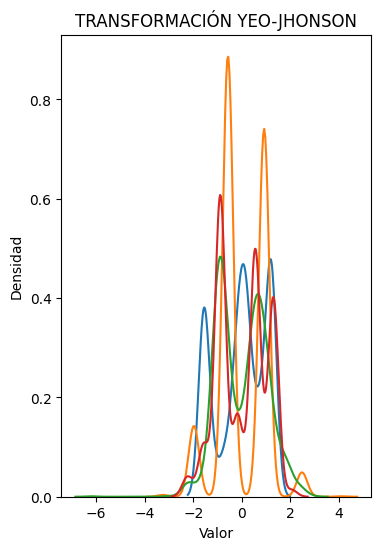

In [56]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

if columnas_seleccionadas:
    Xpandas_T_JOHNSON = Xpandas_T_JOHNSON1[columnas_seleccionadas]
else:
    Xpandas_T_JOHNSON = Xpandas_T_JOHNSON1

fig6, ax = plt.subplots(figsize=(4, 6))

for columna in Xpandas_T_JOHNSON.columns:
    sns.kdeplot(Xpandas_T_JOHNSON[columna], ax=ax, label=columna)
ax.set_title('TRANSFORMACIÓN YEO-JHONSON')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [57]:
def transformacion_minmax_boxcox(X):
    std_dev = X.std()
    constantes = std_dev[std_dev == 0].index
    X_sin_constantes = X.drop(constantes, axis=1)
    minmax_scaler = MinMaxScaler(feature_range=(1, 2))
    Reescalar_X_R = minmax_scaler.fit_transform(X_sin_constantes)
    print("Reescalamiento Min-Max:")
    print(Reescalar_X_R[:5])
    boxcox_transformer = PowerTransformer(method='box-cox', standardize=True)
    Reescalar_X_T_BOX = boxcox_transformer.fit_transform(pd.DataFrame(Reescalar_X_R, columns=X_sin_constantes.columns))
    print("\nTransformación Box-Cox:")
    print(Reescalar_X_T_BOX[:5])
    Xpandas_T_BOX = pd.DataFrame(data=Reescalar_X_T_BOX, columns=X_sin_constantes.columns)
    return Xpandas_T_BOX
Xpandas_T_BOX1 = transformacion_minmax_boxcox(X_T_BOX1)
Xpandas_T_BOX1.head(2)


Reescalamiento Min-Max:
[[2.    1.    1.952 1.    1.    1.    1.825 1.337 1.566 1.738 1.728 1.667
  1.436 1.394 1.    1.777 1.794 1.95  1.833 1.778 1.6   1.    1.333 1.77 ]
 [2.    2.    1.095 1.333 1.084 1.161 1.947 1.783 1.858 1.704 1.765 1.795
  1.653 1.449 1.    1.758 1.604 1.    1.667 1.778 1.6   1.    1.333 1.81 ]
 [1.    2.    1.952 1.333 1.535 1.581 1.847 1.309 1.547 1.77  1.798 1.639
  1.389 1.479 1.    1.758 1.771 1.95  1.833 1.778 1.6   1.    1.    1.623]
 [1.    1.5   1.905 1.333 1.084 1.161 1.96  1.642 1.765 1.707 1.761 1.726
  1.536 1.792 1.    1.744 1.751 1.9   1.667 1.778 1.4   1.    1.    1.53 ]
 [1.    2.    1.381 1.333 1.084 1.161 1.835 1.505 1.676 1.707 1.645 1.696
  1.485 1.523 1.    1.71  1.699 1.35  1.333 1.778 1.6   1.    1.333 1.795]]

Transformación Box-Cox:
[[ 1.426 -0.926  1.331 -0.945 -0.864 -0.911  1.596 -0.829  0.472  1.185
   1.309  1.096  0.547 -0.8   -0.781  1.231  1.292  1.364  1.307  0.208
   0.914 -1.6    0.541  0.63 ]
 [ 1.426  1.35  -1.147  1.019 

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO
0,1.425915,-0.925737,1.330769,-0.944561,-0.863706,-0.911363,1.59564,-0.829438,0.472210,1.185109,1.308609,1.096113,0.546782,-0.799914,-0.781424,1.230923,1.292433,1.364465,1.306616,0.208274,0.914407,-1.599552,0.541066,0.630146
1,1.425915,1.350138,-1.146843,1.018839,0.609423,0.772747,2.48633,3.005946,1.851373,1.089801,1.416328,1.490857,2.130445,-0.395948,-0.781424,1.183286,-0.271416,-2.246247,0.542023,0.208274,0.914407,-1.599552,0.541066,1.002312


In [58]:
std_dev = X1.std()
constantes = std_dev[std_dev == 0].index
print("Columnas constantes:", constantes)
columnas_constantes = std_dev[std_dev == 0].index
columnas_recuperar = [col for col in columnas_constantes if col in Xpandas_T_BOX1.columns]
columnas_recuperadas = X1[columnas_recuperar]
Xpandas_T_BOX1 = pd.concat([Xpandas_T_BOX1, columnas_recuperadas], axis=1)


Columnas constantes: Index([], dtype='object')


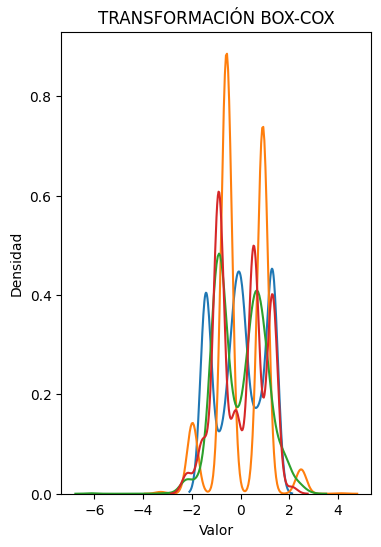

In [59]:
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

if columnas_seleccionadas:
    Xpandas_T_BOX = Xpandas_T_BOX1[columnas_seleccionadas]
else:
    Xpandas_T_BOX = Xpandas_T_BOX1 

fig7, ax = plt.subplots(figsize=(4, 6))
for columna in Xpandas_T_BOX.columns:
    sns.kdeplot(Xpandas_T_BOX[columna], ax=ax, label=columna)
ax.set_title('TRANSFORMACIÓN BOX-COX')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [60]:
figuras = {
    "fig1": fig1,
    "fig2": fig2,
    "fig3": fig3,
    "fig4": fig4,
    "fig5": fig5,
    "fig6": fig6,
    "fig7": fig7
}  

imagenes_base64 = []

for nombre_figura, figura in figuras.items():
    buf = io.BytesIO()
    figura.savefig(buf, format='png')
    buf.seek(0)

    imagen_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    imagenes_base64.append(imagen_base64)

    print(f"El código Base64 de la imagen {nombre_figura} ha sido guardado.")


El código Base64 de la imagen fig1 ha sido guardado.
El código Base64 de la imagen fig2 ha sido guardado.
El código Base64 de la imagen fig3 ha sido guardado.
El código Base64 de la imagen fig4 ha sido guardado.
El código Base64 de la imagen fig5 ha sido guardado.
El código Base64 de la imagen fig6 ha sido guardado.
El código Base64 de la imagen fig7 ha sido guardado.


In [61]:
with open("imagenes_base64.json", "w") as json_file:
    json.dump({"data": imagenes_base64}, json_file)
print("Los códigos Base64 de las imágenes han sido guardados en 'imagenes_base64.json'.")

Los códigos Base64 de las imágenes han sido guardados en 'imagenes_base64.json'.


In [62]:
X1["TRANSFORMACION"]="SIN TRANSFORMACION"
Xpandas_R1["TRANSFORMACION"]="REESCALADO"
Xpandas_E1["TRANSFORMACION"]="ESTANDARIZACION"
Xpandas_N1["TRANSFORMACION"]="NORMALIZADO"
Xpandas_ROB1["TRANSFORMACION"]="ESTANDARIZACION ROBUSTA"
Xpandas_T_BOX1["TRANSFORMACION"]="BOX COX"
Xpandas_T_JOHNSON1["TRANSFORMACION"]="YEO JHONSON"


X_values1=pd.concat([X1,Xpandas_R1,Xpandas_E1,Xpandas_N1,
                    Xpandas_ROB1,Xpandas_T_BOX1,Xpandas_T_JOHNSON1],axis=0)
X_values1.fillna(0,inplace=True)

In [63]:
print(X1.shape)
print(Xpandas_R1.shape)
print(Xpandas_E1.shape)
print(Xpandas_N1.shape)
print(Xpandas_ROB1.shape)
print(Xpandas_T_BOX1.shape)
print(Xpandas_T_JOHNSON1.shape)
print(X_values1.shape)

(2008, 25)
(2008, 25)
(2008, 25)
(2008, 25)
(2008, 25)
(2008, 25)
(2008, 25)
(14056, 25)


In [64]:
X_values1

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,APT_VERB_ICFES,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO,PROMEDIO_UNO,TRANSFORMACION
0,1.000000,0.000000,20.00000,0.000000,0.000000,0.000000,474.210000,65.630000,65.630000,73.090000,75.020000,67.800000,67.800000,57.800000,0.000000,65.240000,79.400000,20.000000,6.000000,9.000000,3.000000,2011.000000,2.000000,35.666667,SIN TRANSFORMACION
1,1.000000,2.000000,2.00000,1.000000,19.000000,5.000000,523.190000,99.480000,99.480000,69.720000,78.830000,80.860000,80.860000,61.280000,0.000000,63.680000,60.440000,1.000000,5.000000,9.000000,3.000000,2011.000000,2.000000,37.466667,SIN TRANSFORMACION
2,0.000000,2.000000,20.00000,1.000000,121.000000,18.000000,483.260000,63.500000,63.500000,76.270000,82.240000,65.030000,65.030000,63.200000,0.000000,63.680000,77.130000,20.000000,6.000000,9.000000,3.000000,2011.000000,1.000000,28.923077,SIN TRANSFORMACION
3,0.000000,1.000000,19.00000,1.000000,19.000000,5.000000,528.520000,88.790000,88.790000,69.980000,78.390000,73.830000,73.830000,82.900000,0.000000,62.460000,75.100000,19.000000,5.000000,9.000000,2.000000,2011.000000,1.000000,24.717949,SIN TRANSFORMACION
4,0.000000,2.000000,8.00000,1.000000,19.000000,5.000000,478.410000,78.360000,78.360000,69.980000,66.480000,70.740000,70.740000,65.980000,0.000000,59.660000,69.930000,8.000000,3.000000,9.000000,3.000000,2011.000000,2.000000,36.800000,SIN TRANSFORMACION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-0.701304,-0.930628,-1.57201,-0.946525,-0.932247,-0.935063,-1.071082,-0.548940,-1.338553,-1.097677,-1.097407,-1.101364,0.956113,0.411030,1.287577,-1.096367,-0.470806,-0.117124,0.550879,0.211232,0.915739,1.527568,0.543691,-0.062854,YEO JHONSON
2004,1.425915,-0.930628,-1.57201,-0.946525,-0.932247,-0.935063,-0.962450,-0.431126,-1.338553,-1.097677,-1.097407,-1.101364,0.571925,0.781173,1.284631,-1.096367,0.592137,1.201984,0.550879,3.608541,-1.975668,1.527568,0.543691,0.834944,YEO JHONSON
2005,-0.701304,-0.930628,-1.57201,-0.946525,-0.932247,-0.935063,-0.940809,-0.667098,-1.338553,-1.097677,-1.097407,-1.101364,0.701480,0.289017,1.304143,-1.096367,0.343819,-0.117124,0.550879,0.211232,-0.574074,1.527568,-1.305223,-0.346120,YEO JHONSON
2006,-0.701304,-0.930628,-1.57201,-0.946525,-0.932247,-0.935063,-1.114734,-0.313648,-1.338553,-1.097677,-1.097407,-1.101364,0.956113,0.289017,1.275439,-1.096367,-0.066100,-0.117124,0.550879,0.211232,0.915739,1.527568,0.543691,-0.108315,YEO JHONSON


In [66]:
import json
import pandas as pd

data_with_columns = X_values1.to_dict(orient='records')

diccionario_dataframes = [
    {

        'dataTransformacion': data_with_columns,
        'columnas': X_values1.columns.tolist()
    }
]

# Guardar en archivo JSON
with open("dataframes.json", "w") as json_file:
    json.dump({"data": diccionario_dataframes}, json_file, indent=4)

print("Los DataFrames han sido guardados en 'dataframes.json'.")



Los DataFrames han sido guardados en 'dataframes.json'.
